<a href="https://colab.research.google.com/github/Vipin8990/python-Datascience/blob/main/wildfire3_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jswlakvipin","key":"839c31973189d0a3d59ba783d7f068a3"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d abdelghaniaaba/wildfire-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset
License(s): other
 99% 1.43G/1.45G [00:15<00:00, 145MB/s] 
100% 1.45G/1.45G [00:15<00:00, 99.7MB/s]


In [5]:
!unzip /content/wildfire-prediction-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: valid/nowildfire/-73.465183,45.443641.jpg  
  inflating: valid/nowildfire/-73.465388,45.584881.jpg  
  inflating: valid/nowildfire/-73.469451,45.480331.jpg  
  inflating: valid/nowildfire/-73.471252,45.51974.jpg  
  inflating: valid/nowildfire/-73.472693,45.427766.jpg  
  inflating: valid/nowildfire/-73.473015,45.435254.jpg  
  inflating: valid/nowildfire/-73.475051,45.56612.jpg  
  inflating: valid/nowildfire/-73.477079,45.597274.jpg  
  inflating: valid/nowildfire/-73.478813,45.555686.jpg  
  inflating: valid/nowildfire/-73.479478,45.524618.jpg  
  inflating: valid/nowildfire/-73.480135,45.528248.jpg  
  inflating: valid/nowildfire/-73.480722,45.518864.jpg  
  inflating: valid/nowildfire/-73.481149,45.563113.jpg  
  inflating: valid/nowildfire/-73.481422,45.559789.jpg  
  inflating: valid/nowildfire/-73.481565,45.467244.jpg  
  inflating: valid/nowildfire/-73.483407,45.637554.jpg  
  inflating: valid/nowildfire/-73.48589

In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [7]:
!pip install tensorflow

In [8]:
!pip install keras

In [9]:
!pip install tqdm

In [10]:
!pip install tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 826.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=051ab676d86381bcdca1a458bbfdd1d52a49caf9ce19e0ed3f180ad0454e2cb4
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


In [11]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [12]:
image_dir_test=Path('/content/test')
image_dir_train=Path('/content/train')
image_dir_val=Path('/content/valid')

In [13]:
filepaths_test= list(image_dir_test.glob(r'**/*.jpg'))
filepaths_train= list(image_dir_train.glob(r'**/*.jpg'))
filepaths_val= list(image_dir_val.glob(r'**/*.jpg'))

In [14]:
labels_test=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths_test))
labels_train=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths_train))
labels_val=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths_val))

In [15]:
filepaths_test=pd.Series(filepaths_test,name='Filepath').astype(str)
labels_test=pd.Series(labels_test,name='Label')
image_df_test=pd.concat([filepaths_test,labels_test],axis=1)
image_df_test

Filepath       Label
0     /content/test/nowildfire/-122.732564,49.219248...  nowildfire
1     /content/test/nowildfire/-114.045187,50.934382...  nowildfire
2     /content/test/nowildfire/-122.818025,49.143584...  nowildfire
3     /content/test/nowildfire/-73.826143,45.561241.jpg  nowildfire
4      /content/test/nowildfire/-75.573981,45.38213.jpg  nowildfire
...                                                 ...         ...
6295      /content/test/wildfire/-72.23594,45.29317.jpg    wildfire
6296      /content/test/wildfire/-70.53898,46.41607.jpg    wildfire
6297      /content/test/wildfire/-74.34156,49.71523.jpg    wildfire
6298      /content/test/wildfire/-74.38818,50.83783.jpg    wildfire
6299      /content/test/wildfire/-78.86921,48.45354.jpg    wildfire

[6300 rows x 2 columns]

In [16]:
filepaths_train=pd.Series(filepaths_train,name='Filepath').astype(str)
labels_train=pd.Series(labels_train,name='Label')
image_df_train=pd.concat([filepaths_train,labels_train],axis=1)
image_df_train

Filepath       Label
0      /content/train/nowildfire/-75.822401,45.409389...  nowildfire
1      /content/train/nowildfire/-73.689778,45.557746...  nowildfire
2      /content/train/nowildfire/-114.036387,51.16172...  nowildfire
3      /content/train/nowildfire/-73.753252,45.636065...  nowildfire
4      /content/train/nowildfire/-73.762965,45.480907...  nowildfire
...                                                  ...         ...
30245     /content/train/wildfire/-78.86193,53.73861.jpg    wildfire
30246     /content/train/wildfire/-68.82512,48.94095.jpg    wildfire
30247     /content/train/wildfire/-78.13539,48.59323.jpg    wildfire
30248     /content/train/wildfire/-63.65101,50.81745.jpg    wildfire
30249     /content/train/wildfire/-72.47939,45.72422.jpg    wildfire

[30250 rows x 2 columns]

In [17]:
filepaths_val=pd.Series(filepaths_val,name='Filepath').astype(str)
labels_val=pd.Series(labels_val,name='Label')
image_df_val=pd.concat([filepaths_val,labels_val],axis=1)
image_df_val

Filepath       Label
0      /content/valid/nowildfire/-73.4617,45.573711.jpg  nowildfire
1     /content/valid/nowildfire/-73.873369,45.483887...  nowildfire
2     /content/valid/nowildfire/-113.963215,50.97701...  nowildfire
3     /content/valid/nowildfire/-114.125428,50.95579...  nowildfire
4     /content/valid/nowildfire/-123.19007,49.152636...  nowildfire
...                                                 ...         ...
6295      /content/valid/wildfire/-74.7111,49.65888.jpg    wildfire
6296     /content/valid/wildfire/-75.63161,48.15798.jpg    wildfire
6297     /content/valid/wildfire/-78.98909,48.72962.jpg    wildfire
6298       /content/valid/wildfire/-75.0614,49.0045.jpg    wildfire
6299     /content/valid/wildfire/-67.38767,49.36301.jpg    wildfire

[6300 rows x 2 columns]

In [18]:
image_df_train.shape

(30250, 2)

In [19]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [20]:
train_images=train_generator.flow_from_dataframe(
    dataframe=image_df_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images=train_generator.flow_from_dataframe(
    dataframe=image_df_val,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=64,
    shuffle=True,
    seed= 42,
    subset='validation'
)

test_images=test_generator.flow_from_dataframe(
    dataframe=image_df_test,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=64,
    shuffle=False
)

Found 24200 validated image filenames belonging to 2 classes.
Found 1260 validated image filenames belonging to 2 classes.
Found 6300 validated image filenames belonging to 2 classes.


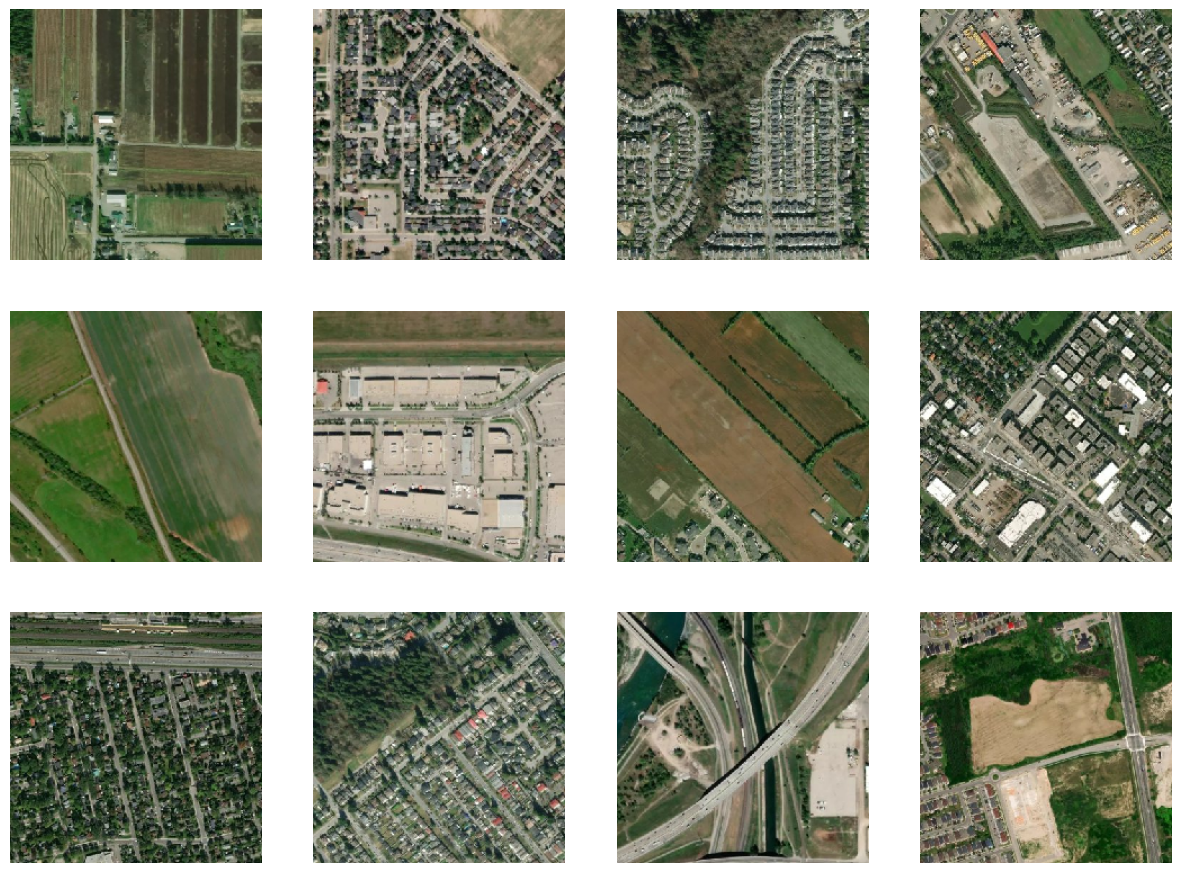

In [21]:
plt.figure(figsize=(15,15))
for images, labels in test_images:
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        #plt.title(int(labels[i]))
        plt.axis("off")
    break

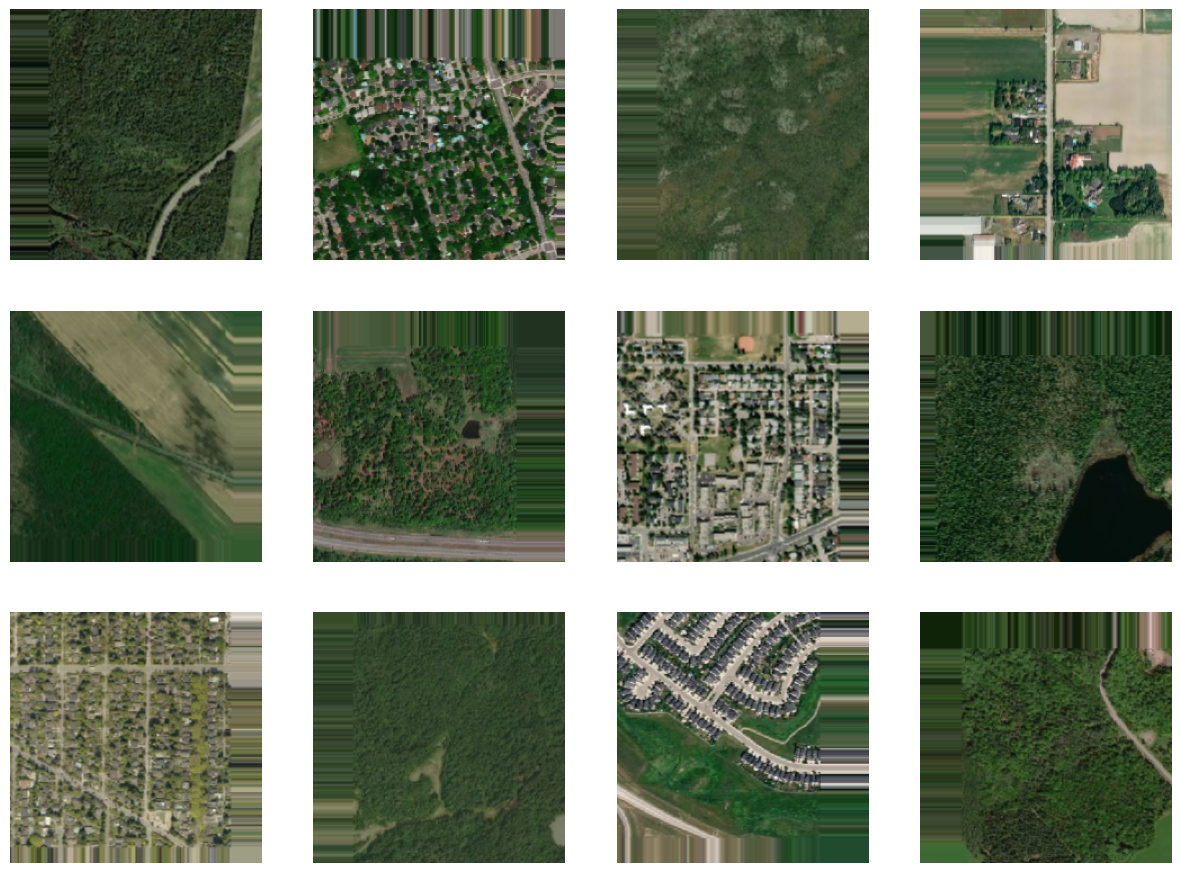

In [22]:
plt.figure(figsize=(15,15))
for images, labels in train_images:
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        #plt.title(int(labels[i]))
        plt.axis("off")
    break

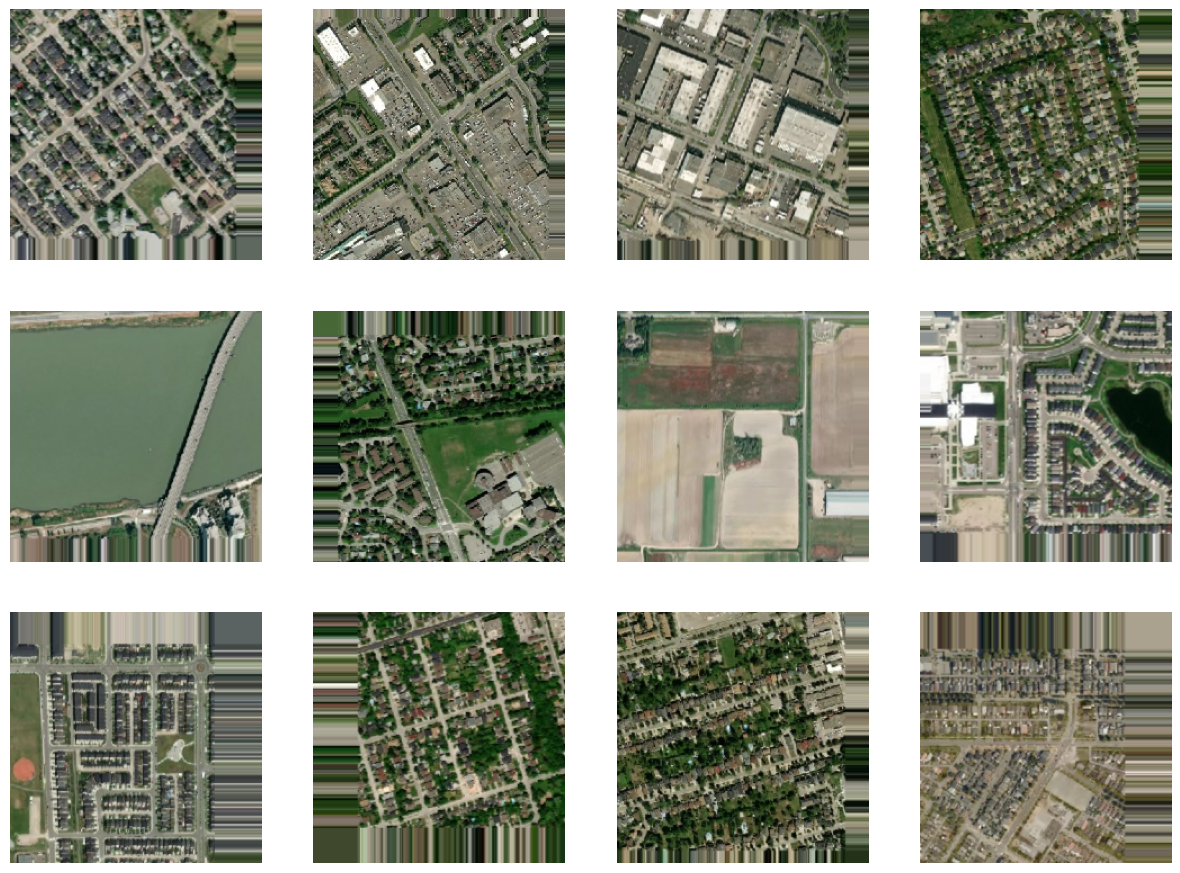

In [23]:
plt.figure(figsize=(15,15))
for images, labels in val_images:
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        #plt.title(int(labels[i]))
        plt.axis("off")
    break

training

In [24]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
def create_model():

     model = Sequential()

     input_shape = (224,224,3)
     activation = 'relu'
     padding = 'same'
     droprate = 0.1
     epsilon=0.001

     model = Sequential()
     model.add(BatchNormalization(input_shape=input_shape))
     model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
     model.add(MaxPooling2D(pool_size=2))
     model.add(BatchNormalization(epsilon=epsilon))


     model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
     model.add(MaxPooling2D(pool_size=2))
     model.add(BatchNormalization(epsilon=epsilon))
     model.add(Dropout(droprate))

     model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
     model.add(MaxPooling2D(pool_size=2))
     model.add(BatchNormalization(epsilon=epsilon))
     model.add(Dropout(droprate))

     model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding))
     model.add(MaxPooling2D(pool_size=2))
     model.add(BatchNormalization(epsilon=epsilon))
     model.add(Dropout(droprate))

     model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
     model.add(MaxPooling2D(pool_size=2))
     model.add(BatchNormalization(epsilon=epsilon))
     model.add(Dropout(droprate))

     model.add(GlobalAveragePooling2D())
     model.add(Flatten())
     model.add(Dropout(droprate))
     model.add(Dense(1, activation='sigmoid'))

     model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])

     return model
model=create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                      

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 5.1 MB/s eta 0:00:00


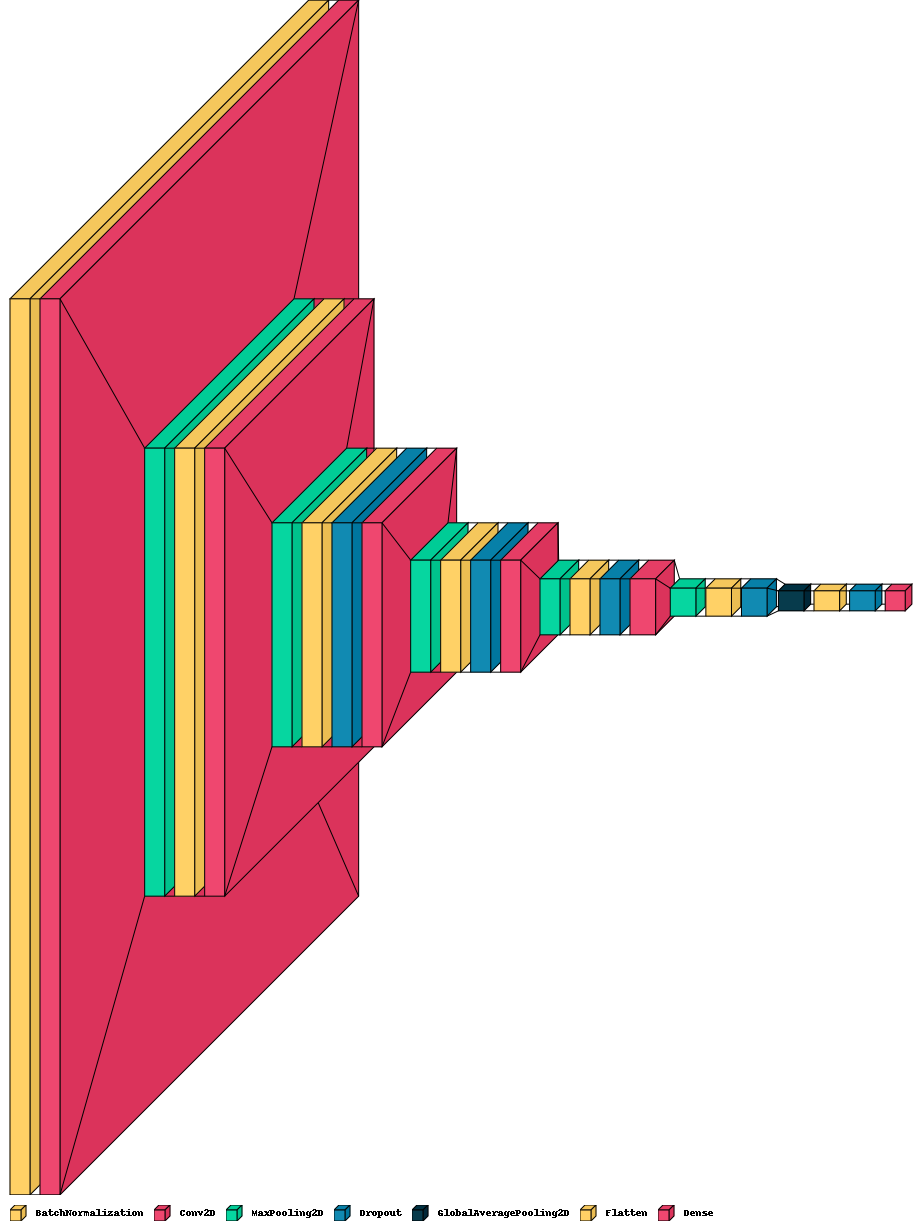

In [25]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True)

In [26]:
history=model.fit(
    train_images,
    validation_data=val_images,
    epochs=15,

    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=4,
            restore_best_weights=True
        ),
         tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )

    ]
)

Epoch 1/15
379/379 [==============================] - 365s 931ms/step - loss: 0.1781 - accuracy: 0.9346 - val_loss: 0.4028 - val_accuracy: 0.8214 - lr: 0.0010
Epoch 2/15
379/379 [==============================] - 347s 915ms/step - loss: 0.1370 - accuracy: 0.9486 - val_loss: 0.1586 - val_accuracy: 0.9365 - lr: 0.0010
Epoch 3/15
379/379 [==============================] - 355s 936ms/step - loss: 0.1243 - accuracy: 0.9537 - val_loss: 0.2221 - val_accuracy: 0.9190 - lr: 0.0010
Epoch 4/15
379/379 [==============================] - 349s 920ms/step - loss: 0.1102 - accuracy: 0.9592 - val_loss: 0.1764 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 5/15
379/379 [==============================] - 350s 923ms/step - loss: 0.1050 - accuracy: 0.9608 - val_loss: 0.4392 - val_accuracy: 0.8429 - lr: 0.0010
Epoch 6/15
379/379 [==============================] - 347s 917ms/step - loss: 0.0850 - accuracy: 0.9697 - val_loss: 0.1238 - val_accuracy: 0.9540 - lr: 1.0000e-04
Epoch 7/15
379/379 [======================

In [27]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger("model_history_log.csv", append=True)

In [28]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [29]:
history=model.fit(
    train_images,
    validation_data=val_images,
    epochs=5,
    callbacks=[
        csv_logger,
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
         tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )

    ]
)

Epoch 1/5
379/379 [==============================] - 350s 922ms/step - loss: 0.0662 - accuracy: 0.9758 - val_loss: 0.1176 - val_accuracy: 0.9548 - lr: 1.0000e-05
Epoch 2/5
379/379 [==============================] - 348s 918ms/step - loss: 0.0661 - accuracy: 0.9760 - val_loss: 0.1234 - val_accuracy: 0.9540 - lr: 1.0000e-05
Epoch 3/5
379/379 [==============================] - 345s 911ms/step - loss: 0.0640 - accuracy: 0.9773 - val_loss: 0.1252 - val_accuracy: 0.9500 - lr: 1.0000e-05
Epoch 4/5
379/379 [==============================] - 344s 909ms/step - loss: 0.0654 - accuracy: 0.9764 - val_loss: 0.1236 - val_accuracy: 0.9556 - lr: 1.0000e-05
Epoch 5/5
379/379 [==============================] - 345s 911ms/step - loss: 0.0600 - accuracy: 0.9779 - val_loss: 0.1166 - val_accuracy: 0.9563 - lr: 1.0000e-06


In [30]:
model.save('wildfiremodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
model.save_weights('weightwildfire.h5')

99/99 [==============================] - 18s 184ms/step - loss: 0.0455 - accuracy: 0.9821
test loss: 0.04550
test acc: 98.21
99/99 [==============================] - 18s 185ms/step


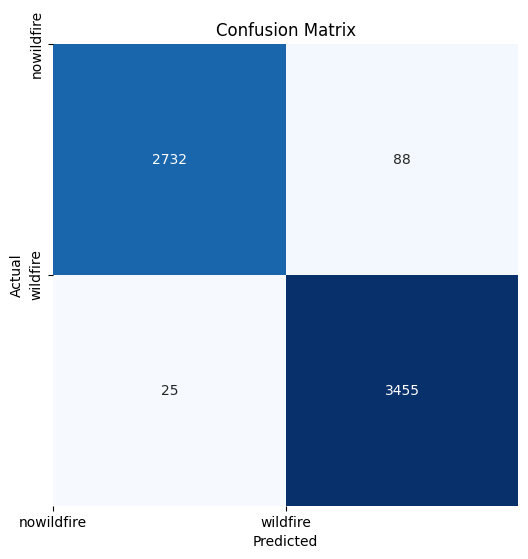

In [34]:
results = model.evaluate(test_images)
print("test loss: {:.5f}".format(results[0]))
print("test acc: {:.2f}".format(results[1]*100))
predictions = (model.predict(test_images) >= 0.5).astype(int)
cm = confusion_matrix(test_images.labels, predictions, labels=[0,1])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0,1], labels=["nowildfire","wildfire"])  # Corrected here
plt.yticks(ticks=[0,1], labels=["nowildfire","wildfire"])  # Corrected here
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


99/99 [==============================] - 18s 176ms/step - loss: 0.0455 - accuracy: 0.9821
test loss: 0.04550
test acc: 98.21
99/99 [==============================] - 18s 180ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

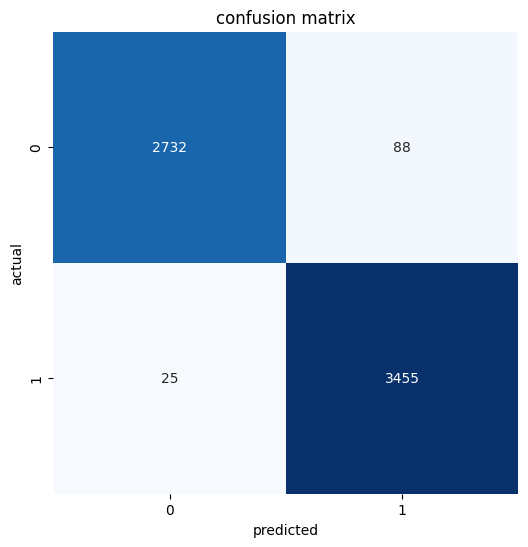

In [36]:
results=model.evaluate(test_images)
print("test loss: {:.5f}".format(results[0]))
print("test acc: {:.2f}".format(results[1]*100))
predictions=(model.predict(test_images)>=0.5).astype(int)
cm=confusion_matrix(test_images.labels,predictions,labels=[0,1])
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='g',vmin=0,cmap='Blues',cbar=False)
plt.xticks(ticks=[0.5,1.5],label=["nowildfire","wildfire"])
plt.yticks(ticks=[0.5,1.5],label=["nowildfire","wildfire"])
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show

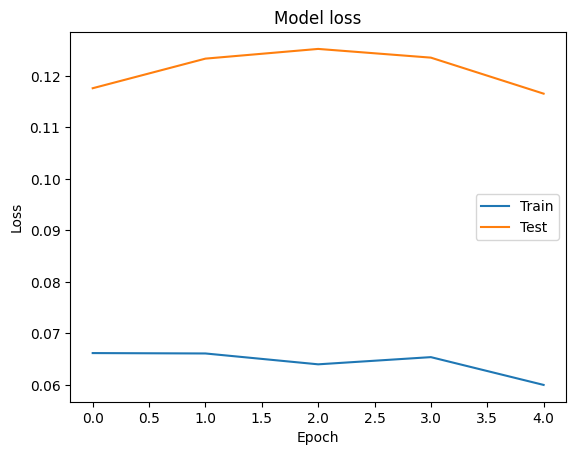

In [37]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()

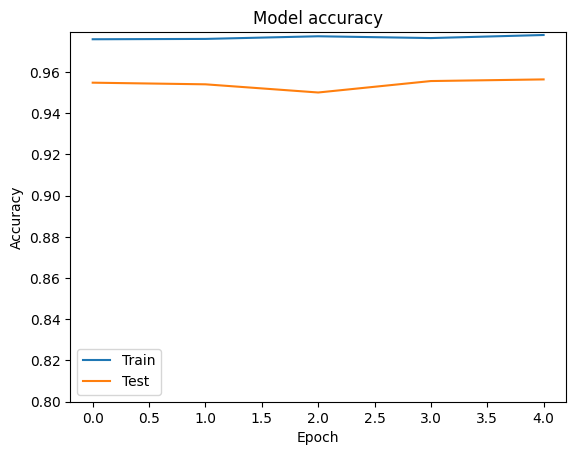

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim(bottom=0.8)
plt.legend(["Train", "Test"])
plt.show()